<a href="https://colab.research.google.com/github/lucguittard/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/Luc_Guittard_LS_DS_114_Make_Features_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200> 

# ASSIGNMENT

- Replicate the lesson code.

 - This means that if you haven't followed along already, type out the things that we did in class. Forcing your fingers to hit each key will help you internalize the syntax of what we're doing.
 - [Lambda Learning Method for DS - By Ryan Herr](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit?usp=sharing)
- Convert the `term` column from string to integer.
- Make a column named `loan_status_is_great`. It should contain the integer 1 if `loan_status` is "Current" or "Fully Paid." Else it should contain the integer 0.

- Make `last_pymnt_d_month` and `last_pymnt_d_year` columns.

In [0]:
##### Begin Working Here #####
import pandas as pd
df = pd.DataFrame({'make':['Ford','Toyota','Fiat','Ford','Toyota','Toyota'], 'color':['silver','red','blue','blue','silver','silver'], 'decade':['1990s','2000s','2010s','2000s','2000s','2010s']})
df.head()

,make,color,decade
0,Ford,silver,1990s
1,Toyota,red,2000s
2,Fiat,blue,2010s
3,Ford,blue,2000s
4,Toyota,silver,2000s


In [0]:
pd.crosstab(df['make'],df['color'])

color,blue,red,silver
make,,,
Fiat,1,0,0
Ford,1,0,1
Toyota,0,1,2


In [0]:
pd.crosstab(df['decade'],df['make'], normalize = 'index')

make,Fiat,Ford,Toyota
decade,,,
1990s,0.0,1.000000,0.000000
2000s,0.0,0.333333,0.666667
2010s,0.5,0.000000,0.500000


In [0]:
ctab = pd.crosstab(df['make'],[df['decade'],df['color']], margins = True)
print(ctab)

decade  1990s 2000s            2010s        All
color  silver  blue red silver  blue silver    
make                                           
Fiat        0     0   0      0     1      0   1
Ford        1     1   0      0     0      0   2
Toyota      0     0   1      1     0      1   3
All         1     1   1      1     1      1   6


In [0]:
ctab2 = pd.crosstab(df['make'],[df['decade'],df['color']], margins = True).T # .T for transpose
print(ctab2)

make           Fiat  Ford  Toyota  All
decade color                          
1990s  silver     0     1       0    1
2000s  blue       0     1       0    1
       red        0     0       1    1
       silver     0     0       1    1
2010s  blue       1     0       0    1
       silver     0     0       1    1
All               1     2       3    6


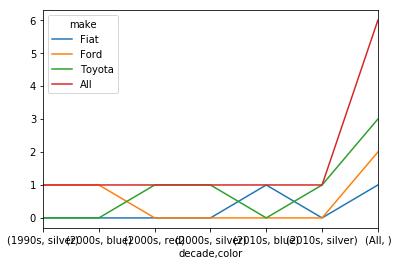

In [0]:
ctab2.plot()

In [8]:
#Making Features using open source data file
import pandas as pd
from google.colab import files
df = files.upload()
#df.head()

Saving NCHS_-_Death_rates_and_life_expectancy_at_birth.csv to NCHS_-_Death_rates_and_life_expectancy_at_birth (4).csv


In [0]:
# use !unzip to unzip local file being imported, eg.( !unzip file.csv.zip )
!head NCHS_-_Death_rates_and_life_expectancy_at_birth.csv


Year,Race,Sex,Average Life Expectancy (Years),Age-adjusted Death Rate
2015,All Races,Both Sexes,,733.1
2014,All Races,Both Sexes,78.9,724.6
2013,All Races,Both Sexes,78.8,731.9
2012,All Races,Both Sexes,78.8,732.8
2011,All Races,Both Sexes,78.7,741.3
2010,All Races,Both Sexes,78.7,747.0
2009,All Races,Both Sexes,78.5,749.6
2008,All Races,Both Sexes,78.2,774.9
2007,All Races,Both Sexes,78.1,775.3


In [0]:
!tail NCHS_-_Death_rates_and_life_expectancy_at_birth.csv

1909,White,Male,50.9,2363.8
1908,White,Male,49.9,2412.3
1907,White,Male,46.0,2637.0
1906,White,Male,47.3,2529.3
1905,White,Male,47.6,2544.7
1904,White,Male,46.6,2630.5
1903,White,Male,49.5,2494.2
1902,White,Male,50.2,2430.1
1901,White,Male,48.0,2582.3
1900,White,Male,46.6,2613.2


In [14]:
import pandas as pd

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

df1 = pd.read_csv ('NCHS_-_Death_rates_and_life_expectancy_at_birth.csv',header=0,skipfooter=0,engine='python') #default for engine is python
print(df1.shape)
df1.head()

(1044, 5)


,Year,Race,Sex,Average Life Expectancy (Years),Age-adjusted Death Rate
0,2015,All Races,Both Sexes,NaN,733.1
1,2014,All Races,Both Sexes,78.9,724.6
2,2013,All Races,Both Sexes,78.8,731.9
3,2012,All Races,Both Sexes,78.8,732.8
4,2011,All Races,Both Sexes,78.7,741.3


In [15]:
df1.tail()

,Year,Race,Sex,Average Life Expectancy (Years),Age-adjusted Death Rate
1039,1904,White,Male,46.6,2630.5
1040,1903,White,Male,49.5,2494.2
1041,1902,White,Male,50.2,2430.1
1042,1901,White,Male,48.0,2582.3
1043,1900,White,Male,46.6,2613.2


In [16]:
df1.isnull().sum().sort_values(ascending=False) #no descending parameter

Average Life Expectancy (Years)    9
Age-adjusted Death Rate            0
Sex                                0
Race                               0
Year                               0
dtype: int64

In [0]:
#print(df1.head(500))


In [17]:
df1['Sex'].value_counts()

Both Sexes    348
Male          348
Female        348
Name: Sex, dtype: int64

In [19]:

df2 = df1.drop(columns = ['Age-adjusted Death Rate'], axis = 'columns') #a measure not readily understood thusfar; no brackets necessary for single column
df2.head()

,Year,Race,Sex,Average Life Expectancy (Years)
0,2015,All Races,Both Sexes,NaN
1,2014,All Races,Both Sexes,78.9
2,2013,All Races,Both Sexes,78.8
3,2012,All Races,Both Sexes,78.8
4,2011,All Races,Both Sexes,78.7


In [20]:
df2.dtypes

Year                                 int64
Race                                object
Sex                                 object
Average Life Expectancy (Years)    float64
dtype: object

In [21]:
#converting data types
#note: will be dropping rows containing 'Both Sexes' as well as those containing 'Both Races' 
#practice...

def remove_word_sexes(string):
  return string.strip('Sexes')

def remove_word_races(string):
  return string.strip('Races')

df2['Sex'] = df2['Sex'].apply(remove_word_sexes)
df2['Race'] = df2['Race'].apply(remove_word_races)
df2.head() #that works

,Year,Race,Sex,Average Life Expectancy (Years)
0,2015,All,Both,NaN
1,2014,All,Both,78.9
2,2013,All,Both,78.8
3,2012,All,Both,78.8
4,2011,All,Both,78.7


In [22]:
df2['Average Life Expectancy (Years)'].value_counts(dropna = False).head(10)

66.8    11
NaN      9
74.7     9
71.1     9
73.9     9
66.6     8
69.5     8
71.4     8
73.4     7
70.2     7
Name: Average Life Expectancy (Years), dtype: int64

In [23]:
df3 = df2['Average Life Expectancy (Years)'].value_counts(dropna=False).reset_index() #does this just add a column? -> check for yourself
print (df3.head(10))

   index  Average Life Expectancy (Years)
0   66.8                               11
1    NaN                                9
2   74.7                                9
3   71.1                                9
4   73.9                                9
5   66.6                                8
6   69.5                                8
7   71.4                                8
8   73.4                                7
9   70.2                                7


In [24]:
#df2.head()
df2.describe(exclude='number')

,Race,Sex
count,1044,1044
unique,3,3
top,Whit,Mal
freq,348,348


In [25]:
df2['Average Life Expectancy (Years)'].isnull().sum()

9

In [26]:
import numpy as np
type(np.NaN)


float

In [29]:
examples = ['social security', 'weight', 'Smoking', np.NaN]

def clean_title(item):
  if isinstance(item,str):
    return item.strip().title()
  else:
    return 'Unknown'
  
[clean_title(item) for item in examples]
#for df application use .apply function: df3['Average Life Expectancy (Years)'] = df2['Average Life Expectancy (Years)'].apply(clean_title)

['Social Security', 'Weight', 'Smoking', 'Unknown']

In [36]:
def clean_column(item):
  if isinstance(item,np.NaN):
    return 'Unknown'
  else:
    return item

df3['Average Life Expectancy (Years)'] = df2['Average Life Expectancy (Years)'].apply(clean_title)
df3.head()  # doesn't work here as NaN is a float

,index,Average Life Expectancy (Years)
0,66.8,NaN
1,NaN,78.9
2,74.7,78.8
3,71.1,78.8
4,73.9,78.7


In [39]:
df3= df2.fillna(value = 'Unknown')
df3.head() #that works fine

,Year,Race,Sex,Average Life Expectancy (Years)
0,2015,All,Both,Unknown
1,2014,All,Both,78.9
2,2013,All,Both,78.8
3,2012,All,Both,78.8
4,2011,All,Both,78.7


In [41]:
df3['Average Life Expectancy (Years)'].value_counts(dropna=False).head(10)

66.8       11
73.9        9
71.1        9
74.7        9
Unknown     9
66.6        8
69.5        8
71.4        8
70.5        7
75.5        7
Name: Average Life Expectancy (Years), dtype: int64

In [43]:
df3['Average Life Expectancy (Years)'].describe(exclude='number')

count     1044.0
unique     379.0
top         66.8
freq        11.0
Name: Average Life Expectancy (Years), dtype: float64

In [45]:
df3['Average Life Expectancy (Years)'].nunique()

379

In [65]:
# df5 = df3.age_manager=True
# df6 = df3
# print(df5)

True


In [73]:
# df6['age_manager'] = True
# #print(df5['age_manager'])

# df6['Average Life Expectancy (Years)'].apply(str)

# df6['age_manager'] = df6['Average Life Expectancy (Years)'].str.contains('78.9') #testing
# df6.head() 

# #nope, refer to class notes for working example

# df6['Average Life Expectancy (Years)'].dtypes

# df6['Average Life Expectancy (Years)'].astype(str).dtypes #outputs object data type 

# df6.head()
# #moving on 


,Year,Race,Sex,Average Life Expectancy (Years),age_manager
0,2015,All,Both,Unknown,False
1,2014,All,Both,78.9,NaN
2,2013,All,Both,78.8,NaN
3,2012,All,Both,78.8,NaN
4,2011,All,Both,78.7,NaN


In [0]:
df3['sex_manager'] = True
print(df3['Sex'])

In [86]:
df3.dtypes
df3['sex_manager'] = df3['Sex'].str.contains("Both")
df3.head() 
#working, now ready for filtering example

,Year,Race,Sex,Average Life Expectancy (Years),sex_manager
0,2015,All,Both,Unknown,True
1,2014,All,Both,78.9,True
2,2013,All,Both,78.8,True
3,2012,All,Both,78.8,True
4,2011,All,Both,78.7,True


In [88]:
df3['sex_manager'].shape

(1044,)

In [84]:
#DF filtering example
df3 = df3.drop(columns=['age_manager'])
condition = (df3['sex_manager'] == True)
both_sexes = df3[condition] 
print(both_sexes.shape)
both_sexes.head()  

(348, 5)


,Year,Race,Sex,Average Life Expectancy (Years),sex_manager
0,2015,All,Both,Unknown,True
1,2014,All,Both,78.9,True
2,2013,All,Both,78.8,True
3,2012,All,Both,78.8,True
4,2011,All,Both,78.7,True


In [89]:
both_sexes = df3[df3['Sex'].str.contains('Both')]
print(both_sexes.shape)
both_sexes.head()

(348, 5)


,Year,Race,Sex,Average Life Expectancy (Years),sex_manager
0,2015,All,Both,Unknown,True
1,2014,All,Both,78.9,True
2,2013,All,Both,78.8,True
3,2012,All,Both,78.8,True
4,2011,All,Both,78.7,True


In [91]:
female = df3[df3['sex_manager'] == False]
print(female.shape)
female.head() 
#note: df3['Sex'], 'Female' missing final 'e'

(696, 5)


,Year,Race,Sex,Average Life Expectancy (Years),sex_manager
116,2015,All,Femal,Unknown,False
117,2014,All,Femal,81.3,False
118,2013,All,Femal,81.2,False
119,2012,All,Femal,81.2,False
120,2011,All,Femal,81.1,False


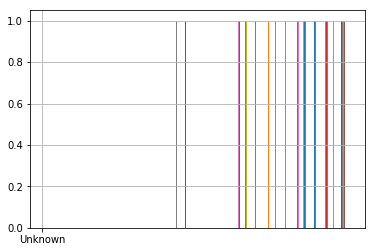

In [93]:
both_sexes['Average Life Expectancy (Years)'].hist(bins=10); #consider binning life-expectancy variable


In [0]:
female['Average Life Expectancy (Years)'].hist(bins=5); #runtime error

In [0]:
both_sexes['Average Life Expectancy (Years)'].plot.density(); #no numeric data error; combined with above graph, 
                                                              # these outputs suggest that the dtype of Average Life Expectancy (Years)
                                                              # has been altered 
   

In [108]:
df1['Average Life Expectancy (Years)'].mean()  #from previous version

64.11729468599037

In [109]:
#Working with dates -> using LendingClub data from class session
!wget https://resources.lendingclub.com/LoanStats_2018Q4.csv.zip
!unzip LoanStats_2018Q4.csv.zip
!head LoanStats_2018Q4.csv


--2019-08-09 01:06:06--  https://resources.lendingclub.com/LoanStats_2018Q4.csv.zip
Resolving resources.lendingclub.com (resources.lendingclub.com)... 64.48.1.20
Connecting to resources.lendingclub.com (resources.lendingclub.com)|64.48.1.20|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘LoanStats_2018Q4.csv.zip’

LoanStats_2018Q4.cs     [        <=>         ]  21.56M  1.72MB/s    in 13s     

2019-08-09 01:06:24 (1.69 MB/s) - ‘LoanStats_2018Q4.csv.zip’ saved [22606280]

Archive:  LoanStats_2018Q4.csv.zip
  inflating: LoanStats_2018Q4.csv    
Notes offered by Prospectus (https://www.lendingclub.com/info/prospectus.action)
"id","member_id","loan_amnt","funded_amnt","funded_amnt_inv","term","int_rate","installment","grade","sub_grade","emp_title","emp_length","home_ownership","annual_inc","verification_status","issue_d","loan_status","pymnt_plan","url","desc","purpose","title","zip_code","addr_state","dti","delinq_2yrs",

In [125]:
lendClub_df = pd.read_csv('LoanStats_2018Q4.csv', header=1)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,123,124,125,128,129,130,133,138,139,140) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [126]:
lendClub_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,...,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,10000.0,10000.0,10000.0,36 months,10.33%,324.23,B,B1,NaN,< 1 year,MORTGAGE,280000.0,Not Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,974xx,OR,6.15,2.0,Jan-1996,0.0,18.0,NaN,14.0,0.0,9082.0,38%,23.0,w,8540.01,8540.01,1936.77,1936.77,1459.99,476.78,0.0,0.0,0.0,Jul-2019,324.23,Jul-2019,Jul-2019,0.0,...,10.0,9.0,11.0,4.0,14.0,0.0,0.0,0.0,4.0,91.3,28.6,0.0,0.0,367828.0,61364.0,20900.0,54912.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,4000.0,4000.0,4000.0,36 months,23.40%,155.68,E,E1,Security,3 years,RENT,90000.0,Source Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,070xx,NJ,26.33,0.0,Sep-2006,4.0,59.0,NaN,15.0,0.0,5199.0,19.2%,20.0,w,3510.60,3510.60,926.28,926.28,489.40,436.88,0.0,0.0,0.0,Jul-2019,155.68,Jul-2019,Jul-2019,0.0,...,8.0,11.0,12.0,7.0,15.0,0.0,0.0,0.0,9.0,95.0,0.0,0.0,0.0,98655.0,66926.0,21900.0,71555.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,5000.0,5000.0,5000.0,36 months,17.97%,180.69,D,D1,Administrative,6 years,MORTGAGE,59280.0,Source Verified,Dec-2018,Late (16-30 days),n,NaN,NaN,debt_consolidation,Debt consolidation,490xx,MI,10.51,0.0,Apr-2011,0.0,NaN,NaN,8.0,0.0,4599.0,19.1%,13.0,w,4456.17,4456.17,895.96,895.96,543.83,352.13,0.0,0.0,0.0,Jun-2019,180.69,Jul-2019,Jul-2019,0.0,...,4.0,6.0,7.0,3.0,8.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,136927.0,11749.0,13800.0,10000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,23000.0,23000.0,23000.0,60 months,20.89%,620.81,D,D4,Operator,5 years,RENT,68107.0,Source Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,672xx,KS,0.52,0.0,Feb-1997,0.0,NaN,NaN,5.0,0.0,976.0,13%,10.0,w,21597.84,21597.84,3686.64,3686.64,1402.16,2284.48,0.0,0.0,0.0,Jul-2019,620.81,Jul-2019,Jul-2019,1.0,...,3.0,5.0,7.0,1.0,5.0,0.0,0.0,0.0,3.0,100.0,0.0,0.0,0.0,7500.0,976.0,3300.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,8000.0,8000.0,8000.0,36 months,23.40%,311.35,E,E1,Manager,10+ years,OWN,43000.0,Source Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consol

In [127]:
#lendClub_df['issue_d'].describe() #beautiful
lendClub_df['next_pymnt_d'].describe() #set header to 1 to fix, next

count       115848
unique           4
top       Aug-2019
freq         89985
Name: next_pymnt_d, dtype: object

In [128]:
lendClub_df['issue_d'].value_counts() #good...

Oct-2018    46305
Nov-2018    41973
Dec-2018    40134
Name: issue_d, dtype: int64

In [0]:
lendClub_df['issue_d'] = pd.to_datetime(lendClub_df['issue_d'], infer_datetime_format = True)

In [131]:
lendClub_df['issue_d'].head().values

array(['2018-12-01T00:00:00.000000000', '2018-12-01T00:00:00.000000000',
       '2018-12-01T00:00:00.000000000', '2018-12-01T00:00:00.000000000',
       '2018-12-01T00:00:00.000000000'], dtype='datetime64[ns]')

In [132]:
lendClub_df['issue_d'].dt.year

0         2018.0
1         2018.0
2         2018.0
3         2018.0
4         2018.0
5         2018.0
6         2018.0
7         2018.0
8         2018.0
9         2018.0
10        2018.0
11        2018.0
12        2018.0
13        2018.0
14        2018.0
15        2018.0
16        2018.0
17        2018.0
18        2018.0
19        2018.0
20        2018.0
21        2018.0
22        2018.0
23        2018.0
24        2018.0
25        2018.0
26        2018.0
27        2018.0
28        2018.0
29        2018.0
30        2018.0
31        2018.0
32        2018.0
33        2018.0
34        2018.0
35        2018.0
36        2018.0
37        2018.0
38        2018.0
39        2018.0
40        2018.0
41        2018.0
42        2018.0
43        2018.0
44        2018.0
45        2018.0
46        2018.0
47        2018.0
48        2018.0
49        2018.0
           ...  
128364    2018.0
128365    2018.0
128366    2018.0
128367    2018.0
128368    2018.0
128369    2018.0
128370    2018.0
128371    2018

In [133]:
lendClub_df['issue_d'].dt.month

0         12.0
1         12.0
2         12.0
3         12.0
4         12.0
5         12.0
6         12.0
7         12.0
8         12.0
9         12.0
10        12.0
11        12.0
12        12.0
13        12.0
14        12.0
15        12.0
16        12.0
17        12.0
18        12.0
19        12.0
20        12.0
21        12.0
22        12.0
23        12.0
24        12.0
25        12.0
26        12.0
27        12.0
28        12.0
29        12.0
30        12.0
31        12.0
32        12.0
33        12.0
34        12.0
35        12.0
36        12.0
37        12.0
38        12.0
39        12.0
40        12.0
41        12.0
42        12.0
43        12.0
44        12.0
45        12.0
46        12.0
47        12.0
48        12.0
49        12.0
          ... 
128364    10.0
128365    10.0
128366    10.0
128367    10.0
128368    10.0
128369    10.0
128370    10.0
128371    10.0
128372    10.0
128373    10.0
128374    10.0
128375    10.0
128376    10.0
128377    10.0
128378    10.0
128379    

In [0]:
 lendClub_df['issue_year'] = lendClub_df['issue_d'].dt.year

In [0]:
lendClub_df['issue_month'] = lendClub_df['issue_d'].dt.month

In [138]:
lendClub_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,...,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,issue_year,issue_month
0,NaN,NaN,10000.0,10000.0,10000.0,36 months,10.33%,324.23,B,B1,NaN,< 1 year,MORTGAGE,280000.0,Not Verified,2018-12-01,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,974xx,OR,6.15,2.0,Jan-1996,0.0,18.0,NaN,14.0,0.0,9082.0,38%,23.0,w,8540.01,8540.01,1936.77,1936.77,1459.99,476.78,0.0,0.0,0.0,Jul-2019,324.23,Jul-2019,Jul-2019,0.0,...,11.0,4.0,14.0,0.0,0.0,0.0,4.0,91.3,28.6,0.0,0.0,367828.0,61364.0,20900.0,54912.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,2018.0,12.0
1,NaN,NaN,4000.0,4000.0,4000.0,36 months,23.40%,155.68,E,E1,Security,3 years,RENT,90000.0,Source Verified,2018-12-01,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,070xx,NJ,26.33,0.0,Sep-2006,4.0,59.0,NaN,15.0,0.0,5199.0,19.2%,20.0,w,3510.60,3510.60,926.28,926.28,489.40,436.88,0.0,0.0,0.0,Jul-2019,155.68,Jul-2019,Jul-2019,0.0,...,12.0,7.0,15.0,0.0,0.0,0.0,9.0,95.0,0.0,0.0,0.0,98655.0,66926.0,21900.0,71555.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,2018.0,12.0
2,NaN,NaN,5000.0,5000.0,5000.0,36 months,17.97%,180.69,D,D1,Administrative,6 years,MORTGAGE,59280.0,Source Verified,2018-12-01,Late (16-30 days),n,NaN,NaN,debt_consolidation,Debt consolidation,490xx,MI,10.51,0.0,Apr-2011,0.0,NaN,NaN,8.0,0.0,4599.0,19.1%,13.0,w,4456.17,4456.17,895.96,895.96,543.83,352.13,0.0,0.0,0.0,Jun-2019,180.69,Jul-2019,Jul-2019,0.0,...,7.0,3.0,8.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,136927.0,11749.0,13800.0,10000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,2018.0,12.0
3,NaN,NaN,23000.0,23000.0,23000.0,60 months,20.89%,620.81,D,D4,Operator,5 years,RENT,68107.0,Source Verified,2018-12-01,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,672xx,KS,0.52,0.0,Feb-1997,0.0,NaN,NaN,5.0,0.0,976.0,13%,10.0,w,21597.84,21597.84,3686.64,3686.64,1402.16,2284.48,0.0,0.0,0.0,Jul-2019,620.81,Jul-2019,Jul-2019,1.0,...,7.0,1.0,5.0,0.0,0.0,0.0,3.0,100.0,0.0,0.0,0.0,7500.0,976.0,3300.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,2018.0,12.0
4,NaN,NaN,8000.0,8000.0,8000.0,36 months,23.40%,311.35,E,E1,Manager,10+ years,OWN,43000.0,Source Verified,2018-12-01,Current,n,NaN,NaN,debt_co

In [139]:
[col for col in lendClub_df if col.endswith('_d')]

['issue_d', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d']

In [141]:
lendClub_df['earliest_cr_line'].head()

0    Jan-1996
1    Sep-2006
2    Apr-2011
3    Feb-1997
4    Jan-1995
Name: earliest_cr_line, dtype: object

In [0]:
lendClub_df['earliest_cr_line'] = pd.to_datetime(lendClub_df['earliest_cr_line'],infer_datetime_format = True)

In [0]:
lendClub_df['days_from_earliest_credit_to_issue'] = (lendClub_df['issue_d'] - lendClub_df['earliest_cr_line']).dt.days

In [148]:
lendClub_df['days_from_earliest_credit_to_issue'].describe()

count    128412.000000
mean       5859.891490
std        2886.535578
min        1126.000000
25%        4049.000000
50%        5266.000000
75%        7244.000000
max       25171.000000
Name: days_from_earliest_credit_to_issue, dtype: float64

In [153]:
#start of Assignment questions:
# Convert the term column from string to integer.
# Make a column named loan_status_is_great. It should contain the integer 1 if loan_status is "Current" or "Fully Paid." Else it should contain the integer 0.
# Make last_pymnt_d_month and last_pymnt_d_year columns.
import numpy as np
lendClub_df.head()
lendClub_df['term'].dtype


dtype('O')

In [163]:
lendClub_df['term'].head()

0     36 months
1     36 months
2     36 months
3     60 months
4     36 months
Name: term, dtype: object

In [188]:
term = ' 20 months'
term[:-7]

' 20'

In [200]:
term.strip('months')

' 20 '

In [190]:
type(term.strip('months'))

str

In [201]:
float(term.strip('months'))

20.0

In [196]:
type(float(term.strip('months')))

float

In [187]:
lendClub_df.get_value(5,'term')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  """Entry point for launching an IPython kernel.


' 60 months'

In [0]:

def convert_term_to_int(string):
  return int(string.strip('months'))

lendClub_df['term'] = lendClub_df['term'].apply(convert_term_to_int)

In [215]:
# Make a column named loan_status_is_great. It should contain the integer 1 if loan_status is "Current" or "Fully Paid." Else it should contain the integer 0.
# Make last_pymnt_d_month and last_pymnt_d_year columns.

#lendClub_df.insert(1,'loan_status_is_great',0)
def update_on_loan_status(status):
  if status == 'Current' or 'Fully Paid':
    return 1
  else:
    return 0
  
lendClub_df['loan_status_is_great'] = lendClub_df['loan_status'].apply(update_on_loan_status)

lendClub_df.head()


,id,loan_status_is_great,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,...,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,issue_year,issue_month,days_from_earliest_credit_to_issue
0,NaN,1,NaN,10000.0,10000.0,10000.0,36 months,10.33%,324.23,B,B1,NaN,< 1 year,MORTGAGE,280000.0,Not Verified,2018-12-01,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,974xx,OR,6.15,2.0,1996-01-01,0.0,18.0,NaN,14.0,0.0,9082.0,38%,23.0,w,8540.01,8540.01,1936.77,1936.77,1459.99,476.78,0.0,0.0,0.0,Jul-2019,324.23,Jul-2019,Jul-2019,...,4.0,14.0,0.0,0.0,0.0,4.0,91.3,28.6,0.0,0.0,367828.0,61364.0,20900.0,54912.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,2018.0,12.0,8370.0
1,NaN,1,NaN,4000.0,4000.0,4000.0,36 months,23.40%,155.68,E,E1,Security,3 years,RENT,90000.0,Source Verified,2018-12-01,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,070xx,NJ,26.33,0.0,2006-09-01,4.0,59.0,NaN,15.0,0.0,5199.0,19.2%,20.0,w,3510.60,3510.60,926.28,926.28,489.40,436.88,0.0,0.0,0.0,Jul-2019,155.68,Jul-2019,Jul-2019,...,7.0,15.0,0.0,0.0,0.0,9.0,95.0,0.0,0.0,0.0,98655.0,66926.0,21900.0,71555.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,2018.0,12.0,4474.0
2,NaN,1,NaN,5000.0,5000.0,5000.0,36 months,17.97%,180.69,D,D1,Administrative,6 years,MORTGAGE,59280.0,Source Verified,2018-12-01,Late (16-30 days),n,NaN,NaN,debt_consolidation,Debt consolidation,490xx,MI,10.51,0.0,2011-04-01,0.0,NaN,NaN,8.0,0.0,4599.0,19.1%,13.0,w,4456.17,4456.17,895.96,895.96,543.83,352.13,0.0,0.0,0.0,Jun-2019,180.69,Jul-2019,Jul-2019,...,3.0,8.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,136927.0,11749.0,13800.0,10000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,2018.0,12.0,2801.0
3,NaN,1,NaN,23000.0,23000.0,23000.0,60 months,20.89%,620.81,D,D4,Operator,5 years,RENT,68107.0,Source Verified,2018-12-01,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,672xx,KS,0.52,0.0,1997-02-01,0.0,NaN,NaN,5.0,0.0,976.0,13%,10.0,w,21597.84,21597.84,3686.64,3686.64,1402.16,2284.48,0.0,0.0,0.0,Jul-2019,620.81,Jul-2019,Jul-2019,...,1.0,5.0,0.0,0.0,0.0,3.0,100.0,0.0,0.0,0.0,7500.0,976.0,3300.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,2018.0,12.0,7973.0
4,NaN,1,NaN,8000.0,8000.0,8000.0,36 months,23.40%,311.35,E,E1,Manager,10+ years,OWN,43000.0,Source Verified,2018-12-0

In [212]:
lendClub_df['loan_status_is_great'].dtype

dtype('int64')

In [235]:
# Make last_pymnt_d_month and last_pymnt_d_year columns.

#lendClub_df.insert(2,'last_payment_d_month',0)
#lendClub_df.insert(3,'last_payment_d_year',0)

#df4 = lendClub_df.drop(columns = ['last_payment_d_month','last_payment_d_year'])
#df4.head()

df4 = df4.drop(columns = ['last_pymnt_d_month'])
df4.insert(2,'last_pymnt_d_month',0)
df4.head()

,id,loan_status_is_great,last_pymnt_d_month,member_id,last_pymnt_d_year,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,...,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,issue_year,issue_month,days_from_earliest_credit_to_issue
0,NaN,1,0,NaN,0,10000.0,10000.0,10000.0,36 months,10.33%,324.23,B,B1,NaN,< 1 year,MORTGAGE,280000.0,Not Verified,2018-12-01,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,974xx,OR,6.15,2.0,1996-01-01,0.0,18.0,NaN,14.0,0.0,9082.0,38%,23.0,w,8540.01,8540.01,1936.77,1936.77,1459.99,476.78,0.0,0.0,0.0,Jul-2019,324.23,...,4.0,14.0,0.0,0.0,0.0,4.0,91.3,28.6,0.0,0.0,367828.0,61364.0,20900.0,54912.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,2018.0,12.0,8370.0
1,NaN,1,0,NaN,0,4000.0,4000.0,4000.0,36 months,23.40%,155.68,E,E1,Security,3 years,RENT,90000.0,Source Verified,2018-12-01,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,070xx,NJ,26.33,0.0,2006-09-01,4.0,59.0,NaN,15.0,0.0,5199.0,19.2%,20.0,w,3510.60,3510.60,926.28,926.28,489.40,436.88,0.0,0.0,0.0,Jul-2019,155.68,...,7.0,15.0,0.0,0.0,0.0,9.0,95.0,0.0,0.0,0.0,98655.0,66926.0,21900.0,71555.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,2018.0,12.0,4474.0
2,NaN,1,0,NaN,0,5000.0,5000.0,5000.0,36 months,17.97%,180.69,D,D1,Administrative,6 years,MORTGAGE,59280.0,Source Verified,2018-12-01,Late (16-30 days),n,NaN,NaN,debt_consolidation,Debt consolidation,490xx,MI,10.51,0.0,2011-04-01,0.0,NaN,NaN,8.0,0.0,4599.0,19.1%,13.0,w,4456.17,4456.17,895.96,895.96,543.83,352.13,0.0,0.0,0.0,Jun-2019,180.69,...,3.0,8.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,136927.0,11749.0,13800.0,10000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,2018.0,12.0,2801.0
3,NaN,1,0,NaN,0,23000.0,23000.0,23000.0,60 months,20.89%,620.81,D,D4,Operator,5 years,RENT,68107.0,Source Verified,2018-12-01,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,672xx,KS,0.52,0.0,1997-02-01,0.0,NaN,NaN,5.0,0.0,976.0,13%,10.0,w,21597.84,21597.84,3686.64,3686.64,1402.16,2284.48,0.0,0.0,0.0,Jul-2019,620.81,...,1.0,5.0,0.0,0.0,0.0,3.0,100.0,0.0,0.0,0.0,7500.0,976.0,3300.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,2018.0,12.0,7973.0
4,NaN,1,0,NaN,0,8000.0,8000.0,8000.0,36 months,23.40%,311.35,E,E1,Manager,10+ years,OWN,43000.0,Source Verified,2018-12-01,Current,n,NaN,NaN,debt_consolidation,Debt con

In [244]:
df4['last_pymnt_d_month'] = pd.to_datetime(df4['last_pymnt_d'],infer_datetime_format = True)

df4['last_pymnt_d_month'] = df4['last_pymnt_d_month'].dt.month  #gouda

#df4.head()

df4['last_pymnt_d_year'] = pd.to_datetime(df4['last_pymnt_d'],infer_datetime_format = True)

df4['last_pymnt_d_year'] = df4['last_pymnt_d_year'].dt.year  #gouda

df4.head()

,id,loan_status_is_great,last_pymnt_d_month,member_id,last_pymnt_d_year,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,...,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,issue_year,issue_month,days_from_earliest_credit_to_issue
0,NaN,1,7.0,NaN,2019.0,10000.0,10000.0,10000.0,36 months,10.33%,324.23,B,B1,NaN,< 1 year,MORTGAGE,280000.0,Not Verified,2018-12-01,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,974xx,OR,6.15,2.0,1996-01-01,0.0,18.0,NaN,14.0,0.0,9082.0,38%,23.0,w,8540.01,8540.01,1936.77,1936.77,1459.99,476.78,0.0,0.0,0.0,Jul-2019,324.23,...,4.0,14.0,0.0,0.0,0.0,4.0,91.3,28.6,0.0,0.0,367828.0,61364.0,20900.0,54912.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,2018.0,12.0,8370.0
1,NaN,1,7.0,NaN,2019.0,4000.0,4000.0,4000.0,36 months,23.40%,155.68,E,E1,Security,3 years,RENT,90000.0,Source Verified,2018-12-01,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,070xx,NJ,26.33,0.0,2006-09-01,4.0,59.0,NaN,15.0,0.0,5199.0,19.2%,20.0,w,3510.60,3510.60,926.28,926.28,489.40,436.88,0.0,0.0,0.0,Jul-2019,155.68,...,7.0,15.0,0.0,0.0,0.0,9.0,95.0,0.0,0.0,0.0,98655.0,66926.0,21900.0,71555.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,2018.0,12.0,4474.0
2,NaN,1,6.0,NaN,2019.0,5000.0,5000.0,5000.0,36 months,17.97%,180.69,D,D1,Administrative,6 years,MORTGAGE,59280.0,Source Verified,2018-12-01,Late (16-30 days),n,NaN,NaN,debt_consolidation,Debt consolidation,490xx,MI,10.51,0.0,2011-04-01,0.0,NaN,NaN,8.0,0.0,4599.0,19.1%,13.0,w,4456.17,4456.17,895.96,895.96,543.83,352.13,0.0,0.0,0.0,Jun-2019,180.69,...,3.0,8.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,136927.0,11749.0,13800.0,10000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,2018.0,12.0,2801.0
3,NaN,1,7.0,NaN,2019.0,23000.0,23000.0,23000.0,60 months,20.89%,620.81,D,D4,Operator,5 years,RENT,68107.0,Source Verified,2018-12-01,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,672xx,KS,0.52,0.0,1997-02-01,0.0,NaN,NaN,5.0,0.0,976.0,13%,10.0,w,21597.84,21597.84,3686.64,3686.64,1402.16,2284.48,0.0,0.0,0.0,Jul-2019,620.81,...,1.0,5.0,0.0,0.0,0.0,3.0,100.0,0.0,0.0,0.0,7500.0,976.0,3300.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,2018.0,12.0,7973.0
4,NaN,1,7.0,NaN,2019.0,8000.0,8000.0,8000.0,36 months,23.40%,311.35,E,E1,Manager,10+ years,OWN,43000.0,Source Verified,2018-12-01,Current,n,

In [0]:
#that's a wrap

# STRETCH OPTIONS

You can do more with the LendingClub or Instacart datasets.

LendingClub options:
- There's one other column in the dataframe with percent signs. Remove them and convert to floats. You'll need to handle missing values.
- Modify the `emp_title` column to replace titles with 'Other' if the title is not in the top 20. 
- Take initiatve and work on your own ideas!

Instacart options:
- Read [Instacart Market Basket Analysis, Winner's Interview: 2nd place, Kazuki Onodera](http://blog.kaggle.com/2017/09/21/instacart-market-basket-analysis-winners-interview-2nd-place-kazuki-onodera/), especially the **Feature Engineering** section. (Can you choose one feature from his bulleted lists, and try to engineer it with pandas code?)
- Read and replicate parts of [Simple Exploration Notebook - Instacart](https://www.kaggle.com/sudalairajkumar/simple-exploration-notebook-instacart). (It's the Python Notebook with the most upvotes for this Kaggle competition.)
- Take initiative and work on your own ideas!

You can uncomment and run the cells below to re-download and extract the Instacart data

In [0]:
# !wget https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz

In [0]:
# !tar --gunzip --extract --verbose --file=instacart_online_grocery_shopping_2017_05_01.tar.gz

In [0]:
# %cd instacart_2017_05_01